### Importing 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load and Exploration of the Data

In [4]:
data=pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.shape

(545, 13)

In [6]:
#data preprocessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Check for null values & perform Data Cleaning

In [9]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
data.select_dtypes('object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


### Converting categorical data into numerical:

In [16]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [12]:
data.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [13]:
#Since, the unique values are 3 we are using ONE HOT ENCODING
x=pd.get_dummies(data['furnishingstatus'],dtype='int')
data=pd.concat([data,x],axis=1)
data=data.drop('furnishingstatus',axis=1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,0,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,1,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,1,0,0


In [14]:
data.select_dtypes('object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [15]:
data.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [17]:
# Since, the unique values are 2 we can use label encoding
data['mainroad']=l.fit_transform(data['mainroad'])

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,1,0,0
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,1,0,0
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,0,1,0
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,1,0,0
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,1,0,0


In [18]:
data.select_dtypes('object')

,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,no,no,no,yes,yes
1,no,no,no,yes,no
2,no,yes,no,no,yes
3,no,yes,no,yes,yes
4,yes,yes,no,yes,no
...,...,...,...,...,...
540,no,yes,no,no,no
541,no,no,no,no,no
542,no,no,no,no,no
543,no,no,no,no,no


In [19]:
data.guestroom.unique()

array(['no', 'yes'], dtype=object)

In [20]:
# Since, the unique values are 2 we can use label encoding
data['guestroom']=l.fit_transform(data['guestroom'])

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,no,no,yes,2,yes,1,0,0
1,12250000,8960,4,4,4,1,0,no,no,yes,3,no,1,0,0
2,12250000,9960,3,2,2,1,0,yes,no,no,2,yes,0,1,0
3,12215000,7500,4,2,2,1,0,yes,no,yes,3,yes,1,0,0
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,no,1,0,0


In [21]:
data.select_dtypes('object')

,basement,hotwaterheating,airconditioning,prefarea
0,no,no,yes,yes
1,no,no,yes,no
2,yes,no,no,yes
3,yes,no,yes,yes
4,yes,no,yes,no
...,...,...,...,...
540,yes,no,no,no
541,no,no,no,no
542,no,no,no,no
543,no,no,no,no


In [22]:
data.basement.unique()

array(['no', 'yes'], dtype=object)

In [23]:
# Since, the unique values are 2 we can use label encoding
data['basement']=l.fit_transform(data['basement'])

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,1,0,0
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,1,0,0
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,0,1,0
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,1,0,0
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,1,0,0


In [24]:
data.select_dtypes('object')

,hotwaterheating,airconditioning,prefarea
0,no,yes,yes
1,no,yes,no
2,no,no,yes
3,no,yes,yes
4,no,yes,no
...,...,...,...
540,no,no,no
541,no,no,no
542,no,no,no
543,no,no,no


In [25]:
data.hotwaterheating.unique()

array(['no', 'yes'], dtype=object)

In [26]:
# Since, the unique values are 2 we can use label encoding
data['hotwaterheating']=l.fit_transform(data['hotwaterheating'])

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,yes,2,yes,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,yes,3,no,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,no,2,yes,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,yes,3,yes,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,yes,2,no,1,0,0


In [27]:
data.select_dtypes('object')

,airconditioning,prefarea
0,yes,yes
1,yes,no
2,no,yes
3,yes,yes
4,yes,no
...,...,...
540,no,no
541,no,no
542,no,no
543,no,no


In [28]:
data.airconditioning.unique()

array(['yes', 'no'], dtype=object)

In [29]:
# Since, the unique values are 2 we can use label encoding
data['airconditioning']=l.fit_transform(data['airconditioning'])

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,1,0,0


In [30]:
data.select_dtypes('object')

,prefarea
0,yes
1,no
2,yes
3,yes
4,no
...,...
540,no
541,no
542,no
543,no


In [31]:
data.prefarea.unique()

array(['yes', 'no'], dtype=object)

In [32]:
# Since, the unique values are 2 we can use label encoding
data['prefarea']=l.fit_transform(data['prefarea'])

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [33]:
data.select_dtypes('object')

""
0
1
2
3
4
...
540
541
542
543


###  Check Features Correlation 

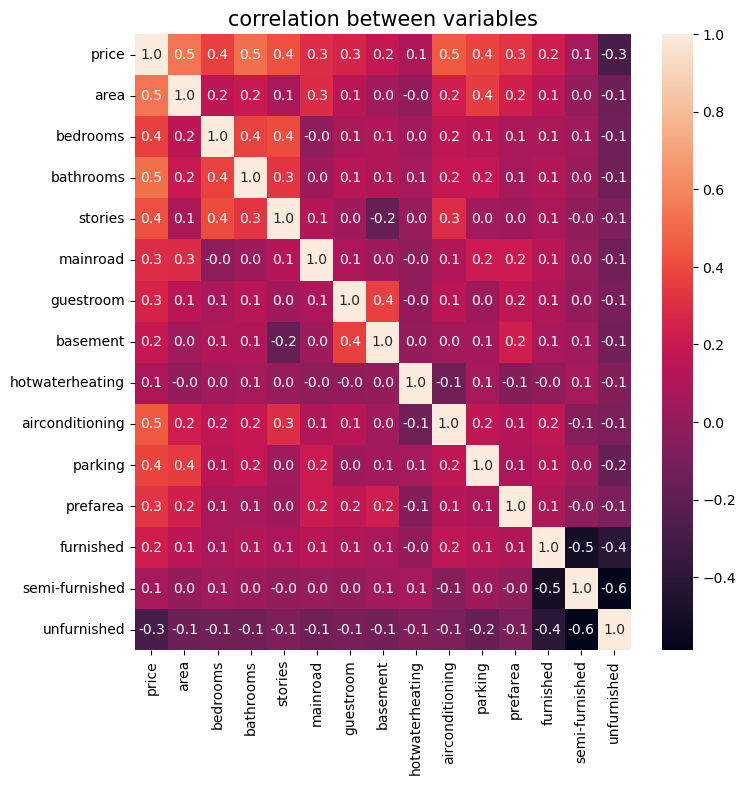

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,fmt='1.1f')
plt.title("correlation between variables",size=15)
plt.show()

###  Extract Features (X) and Labels (Y) from Data

In [39]:
from sklearn.model_selection import train_test_split

In [36]:
#Independent Variable (X) & Dependent Variable (Y)
x=data.drop('price',axis=1)
y=data.price

In [37]:
x.shape,y.shape

((545, 14), (545,))

In [40]:
#Split the dataset for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((436, 14), (109, 14), (436,), (109,))

###  Training the model with Multi Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

###  Prediction of the model

In [69]:
#prediction
y_pred=model.predict(x_test)
print(y_pred)

[ 3950288.61876184  6173868.81883111  4483635.98836252  7258732.75105288
  2836727.58490482  7032947.09749074  3203851.47112392  3270994.00904054
  3472554.03645915  8289978.32623725  6605321.62954623  3723366.23684094
  3812376.95976085  4548966.8454461   4020476.34849668  1969836.22090135
  4057262.98087852  3704586.86711741  3282767.93188792  4609423.64909564
  5968243.7363716   6363698.62063814  4751300.32389     2659595.27633028
  5305573.24662117  5680819.58784461  5404106.90027142  5543050.52192535
  5768360.47982209  5801753.70839283  3389277.96110608  6399092.02678424
  7081030.31411774  2913042.40387669  4498664.01335423  5210561.68059367
  5013457.8412231   3707596.71347575  2916603.4548534   3937761.75634066
  8041334.20180917  4942174.61142058  6432605.2198175   3511338.78156424
  3813475.39540795  6434856.19540026  4447687.02885138  2696243.71724904
  4180018.70625787  6455973.25779222  4056226.34306794  7124571.30073177
  2530661.67791756  3033278.4641963   3500830.32062

In [70]:
def predict(area=0, bedrooms=0, bathrooms=0, stories=0, mainroad=0,
       guestroom=0, basement=0, hotwaterheating=0, airconditioning=0,
       parking=0, prefarea=0, furnished=0, semi_furnished=0, unfurnished=1):
    
    x=np.array([area, bedrooms, bathrooms, stories, mainroad,
       guestroom, basement, hotwaterheating, airconditioning,
       parking, prefarea, furnished, semi_furnished, unfurnished]).reshape(-1,14)
    price=model.predict(x)
    return price
price=predict(3460,4,1,2,1,0,0,0,1,0,0,0,1)
print(price)

[4191334.49635171]


In [71]:
x_test[2:][:1]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
325,3460,4,1,2,1,0,0,0,1,0,0,0,1,0


In [72]:
y_test[2:][:1]

325    4007500
Name: price, dtype: int64

### To assess the performance of the linear regression model

In [85]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [86]:
mae=mean_absolute_error(y_test,y_pred)

In [87]:
mse=mean_squared_error(y_test,y_pred)

In [88]:
r2=r2_score(y_test,y_pred)

In [89]:
print("mean_absolute_error:",mae)
print("mean_squared_error:",mse)
print("r2_score:",r2*100)

mean_absolute_error: 716231.1189748812
mean_squared_error: 976484771024.6141
r2_score: 66.11214250980093
